# Data Exploration with Pandas

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/titanic-train.csv')

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### Indexing

In [ ]:
df.iloc[3]

In [ ]:
df.loc[0:4,'Ticket']

In [ ]:
df['Ticket'].head()

In [ ]:
df[['Embarked', 'Ticket']].head()

### Selections

In [ ]:
df[df['Age'] > 70]

In [ ]:
df['Age'] > 70

In [ ]:
df.query("Age > 70")

In [ ]:
df[(df['Age'] == 11) & (df['SibSp'] == 5)]

In [ ]:
df[(df.PassengerId == 11) | (df.SibSp == 5)]

In [ ]:
df.query('(Age == 11) | (SibSp == 5)')

### Unique Values

In [ ]:
df['Embarked'].unique()

### Sorting

In [ ]:
df.sort_values('Age', ascending = False).head()

### Aggregations

In [ ]:
df['Survived'].value_counts()

In [ ]:
df['Pclass'].value_counts()

In [ ]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

In [ ]:
df['Age'].min()

In [ ]:
df['Age'].max()

In [ ]:
df['Age'].mean()

In [ ]:
df['Age'].median()

In [ ]:
mean_age_by_survived = df.groupby('Survived')['Age'].mean()
mean_age_by_survived

In [ ]:
std_age_by_survived = df.groupby('Survived')['Age'].std()
std_age_by_survived

### Merge

In [ ]:
df1 = mean_age_by_survived.round(0).reset_index()
df2 = std_age_by_survived.round(0).reset_index()

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3 = pd.merge(df1, df2, on='Survived')

In [ ]:
df3

In [ ]:
df3.columns = ['Survived', 'Average Age', 'Age Standard Deviation']

In [ ]:
df3

### Pivot Tables

In [ ]:
df.pivot_table(index='Pclass',
               columns='Survived',
               values='PassengerId',
               aggfunc='count')

### Correlations

In [ ]:
df['IsFemale'] = df['Sex'] == 'female'

In [ ]:
correlated_with_survived = df.corr()['Survived'].sort_values()
correlated_with_survived

In [ ]:
%matplotlib inline

In [ ]:
correlated_with_survived.iloc[:-1].plot(kind='bar',
                                        title='Titanic Passengers: correlation with survival')

# Visual Data Exploration with Matplotlib

In [ ]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [ ]:
data = np.vstack([data1, data2, data3, data4]).transpose()

In [ ]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

### Line Plot

In [ ]:
df.plot(title='Line plot')

In [ ]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4'])

### Scatter Plot

In [ ]:
df.plot(style='.')

In [ ]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

### Histograms

In [ ]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.5)

### Cumulative distribution

In [ ]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        normed=True,
        cumulative=True,
        alpha=0.4)

### Box Plot

In [ ]:
df.plot(kind='box',
        title='Boxplot', figsize=(8,8))

### Subplots

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))

df.plot(ax=ax[0][0],
        title='Line plot', figsize=(5,5))

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot',figsize=(5,5))

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram',figsize=(5,5))

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot',figsize=(5,5))

plt.tight_layout()

### Pie charts

In [ ]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16)

### Hexbin plot

In [ ]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])

In [ ]:
df.head()

In [ ]:
df.plot()

In [ ]:
df.plot(kind='kde')

In [ ]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow')
df.plot(kind="hist")

# Unstructured data

### Images

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('../data/iss.jpg')
img

In [ ]:
type(img)

In [ ]:
imgarray = np.asarray(img)

In [ ]:
type(imgarray)

In [ ]:
imgarray.shape

In [ ]:
imgarray.ravel().shape

In [ ]:
435 * 640 * 3

### Sound

In [ ]:
from scipy.io import wavfile

In [ ]:
rate, snd = wavfile.read(filename='../data/sms.wav')

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=snd, rate=rate)

In [ ]:
len(snd)

In [ ]:
snd

In [ ]:
plt.plot(snd)

In [ ]:
_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

# Data Exploration Exercises

## Exercise
- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function [`pd.to_datetime()`](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

In [ ]:
df = pd.read_csv('../data/international-airline-passengers.csv')
df.info()
df.head()

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df = df.set_index('Month')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.plot(title='My Plot')
        

## Exercise
- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

In [216]:
df = pd.read_csv('../data/weight-height.csv')

In [217]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [218]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [219]:
df['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

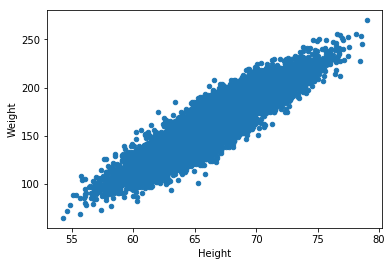

In [221]:
_=df.plot(kind='scatter',
        x= 'Height',
        y='Weight')

In [222]:
df['Gendercolor']= df['Gender'].map({'Male':'blue', 'Female':'red'})

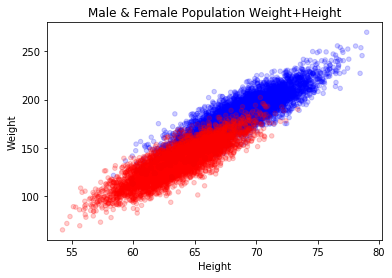

In [224]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       c=df['Gendercolor'],
       alpha= 0.2,
       title= 'Male & Female Population Weight+Height')

## Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using `plt.axvline()`

In [235]:
#males= df[df['Gender']=='Male']
males = df.query('Gender == "Male"')
females = df.query('Gender== "Female"')

Text(0.5, 1.0, 'Male & Female Population')

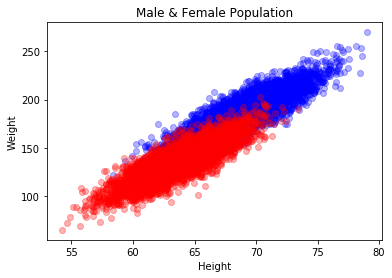

In [236]:
fig, ax= plt.subplots()
ax.plot(males['Height'],males['Weight'],'ob',
       females['Height'], females['Weight'], 'or', alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Population')

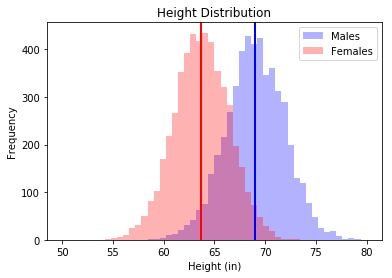

In [239]:
males['Height'].plot(kind='hist',
                     bins=50,
                     range=(50,80),
                     alpha=0.3,
                     color ='blue')
females['Height'].plot(kind='hist',
                     bins=50,
                     range=(50,80),
                     alpha=0.3,
                     color ='red')
plt.title('Height Distribution')
plt.legend(["Males","Females"])
plt.xlabel("Height (in)")

plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red', linewidth=2)


## Exercise
- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

In [248]:
dfpvt= df.pivot(columns = 'Gender',values = 'Weight')

In [249]:
dfpvt.head()

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801


Text(0, 0.5, 'Weight(lbs)')

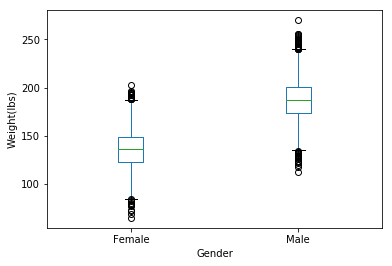

In [253]:
dfpvt.plot(kind='box')
plt.xlabel('Gender')
plt.ylabel('Weight(lbs)')

## Exercise
- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

In [255]:
df=pd.read_csv('../data/titanic-train.csv')

In [256]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
from pandas.tools.plotting import scatter_matrix

C:\Users\Ahmad\Anaconda3\envs\ztdl\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


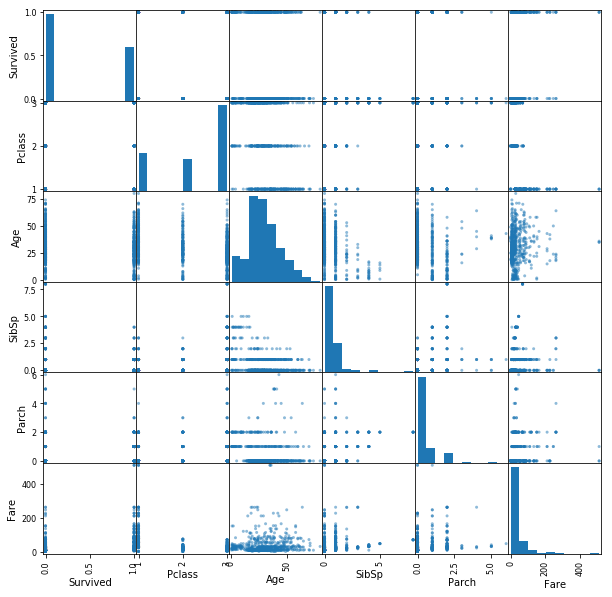

In [269]:
_=scatter_matrix(df.drop('PassengerId', axis=1),figsize=(10,10))